# ==========================================================================
# 📝 Tarea: Reducción de la Numerosidad con CNN, ENN y K-medias usando SVM
# 📊 Dataset: Breast Cancer (Scikit-Learn)
# 👤 Autor/a: [Antonio Calzadilla Miranda]
# 📝 Matricula: 263861
# 📅 Fecha: [14/11/2025]
# ==========================================================================

## 🔍 Descripción:
En este cuaderno aplicarás técnicas de reducción de la numerosidad (CNN, ENN, K-medias) al conjunto de datos Breast Cancer y analizarás su efecto en el rendimiento de un modelo SVM.

## ==========================================================================

## 1. Cargar librerías necesarias
Escribe aquí la importación de librerías: numpy, pandas, matplotlib, seaborn, sklearn (datasets, model_selection, preprocessing, metrics, svm, kmeans), etc.

En el caso de los códigos de ENN, CNN, estos  deberás tomarlos del cuaderno que contiene la teoría y ejemplos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from collections import Counter

# --- Carga de Datos y Preprocesamiento ---
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- Modelado y Evaluación ---
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report

# --- Técnicas de Reducción (Imbalanced-Learn) ---
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import EditedNearestNeighbours

# --- Técnica de Prototipado (Scikit-Learn) ---
from sklearn.cluster import KMeans

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from collections import Counter

# --- Cargar el Dataset ---
# El parámetro as_frame=True lo convertiría directamente a un DataFrame de Pandas,
# pero lo haremos manualmente para entender la estructura del objeto 'Bunch'.
data = load_breast_cancer()

# ¿Qué tipo de objeto es?
print(f"Tipo de objeto cargado: {type(data)}")

# El objeto 'Bunch' tiene claves útiles
print(f"\nClaves disponibles en el objeto: {list(data.keys())}")

Tipo de objeto cargado: <class 'sklearn.utils._bunch.Bunch'>

Claves disponibles en el objeto: ['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Instalar imbalanced-learn, que contiene CNN y ENN
!pip install -U imbalanced-learn

# --------------------------------------------------------------------------

## 2. Cargar y explorar el conjunto de datos Breast Cancer
- Cargar el dataset con sklearn.datasets.load_breast_cancer
- Explora las dimensiones, variables, y distribución de clases

In [4]:
#2. Cargar y explorar el conjunto de datos Breast Cancer

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from collections import Counter

# Cargar el dataset
data = load_breast_cancer()

# Asignamos las features (X) y el objetivo (y) para facilidad de uso
X = data.data
y = data.target

print("¡Dataset cargado exitosamente!")

¡Dataset cargado exitosamente!


In [6]:
print("--- 1. Dimensiones ---")
print(f"Forma de la matriz de features (X): {X.shape}")
print(f"Forma del vector objetivo (y): {y.shape}")
print(f"  > Total de instancias (pacientes): {X.shape[0]}")
print(f"  > Total de variables (features): {X.shape[1]}")


print("\n--- 2. Distribución de Clases (Target) ---")
print(f"Nombres de las clases: {list(data.target_names)}")
# data.target_names[0] es 'malignant' (Maligno)
# data.target_names[1] es 'benign' (Benigno)

counts = Counter(y)
print(f"Conteo de instancias por clase:")
print(f"  Clase 0 ({data.target_names[0]}): {counts[0]} instancias")
print(f"  Clase 1 ({data.target_names[1]}): {counts[1]} instancias")

# Calcular porcentajes
total = len(y)
pct_0 = 100 * counts[0] / total
pct_1 = 100 * counts[1] / total
print(f"Porcentaje: {pct_0:.2f}% (Clase 0) vs {pct_1:.2f}% (Clase 1)")

--- 1. Dimensiones ---
Forma de la matriz de features (X): (569, 30)
Forma del vector objetivo (y): (569,)
  > Total de instancias (pacientes): 569
  > Total de variables (features): 30

--- 2. Distribución de Clases (Target) ---
Nombres de las clases: [np.str_('malignant'), np.str_('benign')]
Conteo de instancias por clase:
  Clase 0 (malignant): 212 instancias
  Clase 1 (benign): 357 instancias
Porcentaje: 37.26% (Clase 0) vs 62.74% (Clase 1)


In [7]:
print("\n--- 3. Variables (Features) ---")
print("Los nombres de las 30 variables son:")
print(data.feature_names)

# Para una mejor visualización y análisis, lo cargamos en un DataFrame de Pandas
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

print("\n--- Estadísticas Descriptivas (con Pandas) ---")
# .describe() muestra la media, desviación estándar, mínimos y máximos
# Transponemos (.T) para que sea más fácil de leer
print(df.describe().T)


--- 3. Variables (Features) ---
Los nombres de las 30 variables son:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

--- Estadísticas Descriptivas (con Pandas) ---
                         count        mean         std         min  \
mean radius              569.0   14.127292    3.524049    6.981000   
mean texture             569.0   19.289649    4.301036    9.710000   
mean perimeter           569.0   91.969033   24.298981   43.790000   
mean area                569.0  654.889104  351

Análisis de esta salida:

Todas las 30 variables son numéricas y continuas.

Un punto importante si se quieren analizar las variables numericas es ponerlas en la misma escala ya que actualmente todas tienen escalas muy extremas, por lo cual un escalado de datos es obligatorio ya que los modelos SVM y K-Means son sensibles a la escala de las variables.

Si no se escalan las variables, la variable mean area dominará completamente el modelo y mean smoothness será ignorada. Por lo cual se recomienda usar usar StandardScaler antes de entrenar cualquier modelo.


# --------------------------------------------------------------------------

## 3. Preprocesamiento
 - Escalamiento de características (StandardScaler)
 - División del conjunto en entrenamiento y prueba
 - usar hold-out de 70% y 30%



In [8]:
# 3. Preprocesamiento

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter

# Asumiendo que 'X' e 'y' ya están cargados del paso anterior
print(f"Forma original de X: {X.shape}")
print(f"Forma original de y: {y.shape}")

# --- 1. División del conjunto (Hold-Out 70/30) ---
# Dividimos los datos ANTES de cualquier escalado.

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,    # 30% de los datos para prueba
    random_state=42,  # Semilla para reproducibilidad
    stratify=y        # MUY IMPORTANTE: mantiene la proporción de clases
                      # (63% benignos, 37% malignos) en ambos conjuntos.
)

print("\n--- Después de la División ---")
print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de X_test: {X_test.shape}")
print(f"Forma de y_train: {y_train.shape}")
print(f"Forma de y_test: {y_test.shape}")


# --- 2. Escalamiento de Características (StandardScaler) ---

# a) Crear una instancia del escalador
scaler = StandardScaler()

# b) Ajustar el escalador (calcular la media y std) SÓLO con X_train
scaler.fit(X_train)

# c) Transformar X_train y X_test usando el escalador ajustado
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print("\n--- Después del Escalado ---")
# Verificamos que los datos de entrenamiento ahora tienen media ~0
print(f"Media de la primera feature en X_train (debe ser ~0): {X_train[:, 0].mean():.6f}")
print(f"Std Dev de la primera feature en X_train (debe ser ~1): {X_train[:, 0].std():.6f}")

print("\n¡Preprocesamiento completado! Los datos están listos para el modelado.")

Forma original de X: (569, 30)
Forma original de y: (569,)

--- Después de la División ---
Forma de X_train: (398, 30)
Forma de X_test: (171, 30)
Forma de y_train: (398,)
Forma de y_test: (171,)

--- Después del Escalado ---
Media de la primera feature en X_train (debe ser ~0): -0.000000
Std Dev de la primera feature en X_train (debe ser ~1): 1.000000

¡Preprocesamiento completado! Los datos están listos para el modelado.


Dado que los datos tienen escalas muy diferentes se sugiere usar StandardScaler a fin de estandarizar todas las variables. (media=0, desviación=1), a fin de asegurarse que SVM y K-Means las traten con igual importancia.

Hold-Out (70/30): Se separa el 30% de los datos (X_test, y_test) para simular un escenario real. El modelo (SVM) se entrena solo con el 70% (X_train) y su rendimiento final se mide en el 30% que nunca ha visto el modelo.

Stratify=y: Permite mantener la proporcion, por lo cual si la clase "maligna" es el 37% del total, también será el 37% en X_train y el 37% en X_test. Esto evita que, por mala suerte, un conjunto tenga muchas más instancias de una clase que el otro.

# --------------------------------------------------------------------------

## 4. Aplicar técnica CNN (Condensed Nearest Neighbor)

- Aplicar CNN sobre el conjunto de entrenamiento
- Mostrar el tamaño del conjunto reducido



In [10]:
from sklearn.utils.validation import check_X_y
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import random

class CNN:
    """
    Condensed Nearest Neighbors (CNN) - versión adaptada para datos densos.

    Este algoritmo reduce el conjunto de entrenamiento reteniendo solo
    las instancias necesarias para preservar la capacidad de clasificación
    bajo la regla 1-NN (o k-NN si se ajusta n_neighbors).

    Basado en:
    P. E. Hart, The condensed nearest neighbor rule (1968).
    """

    def __init__(self, n_neighbors=1):
        self.n_neighbors = n_neighbors
        self.classifier = KNeighborsClassifier(n_neighbors=self.n_neighbors)
        self.sample_indices_ = []

    def select_data(self, X, y):
        # Validación de entrada: datos densos
        X, y = check_X_y(X, y, accept_sparse=False)

        idx_s = []  # índice de instancias seleccionadas
        classes = np.unique(y)
        self.classes_ = classes

        # Iniciar con una instancia aleatoria por clase
        for cur_class in classes:
            mask = np.where(y == cur_class)[0]
            choose_id = random.choice(mask)
            idx_s.append(choose_id)

        # Revisión aleatoria del resto de las instancias
        train_idx = list(range(len(y)))
        random.shuffle(train_idx)

        flag = True
        while flag:
            flag = False
            self.classifier.fit(X[idx_s], y[idx_s])
            for idx in train_idx:
                if idx not in idx_s:
                    x_i = X[idx].reshape(1, -1)
                    if self.classifier.predict(x_i) != [y[idx]]:
                        idx_s.append(idx)
                        self.classifier.fit(X[idx_s], y[idx_s])
                        flag = True

        self.X_ = X[idx_s]
        self.y_ = y[idx_s]
        self.sample_indices_ = sorted(idx_s)
        self.reduction_ = 1.0 - len(self.y_) / len(y)
        return self.X_, self.y_

In [11]:
# --- Aplicar CNN (Usando tu clase) para crear X_train_cnn ---
print("Aplicando CNN (Custom) sobre X_train...")

# 1. Instanciar tu clase
cnn_selector = CNN(n_neighbors=1)

# 2. Aplicar el método .select_data() sobre X_train, y_train
# ESTO CREA LAS VARIABLES QUE FALTAN
X_train_cnn, y_train_cnn = cnn_selector.select_data(X_train, y_train)

print(f"Instancias tras CNN: {len(y_train_cnn)} (Reducción: {cnn_selector.reduction_*100:.2f}%)")

Aplicando CNN (Custom) sobre X_train...
Instancias tras CNN: 58 (Reducción: 85.43%)


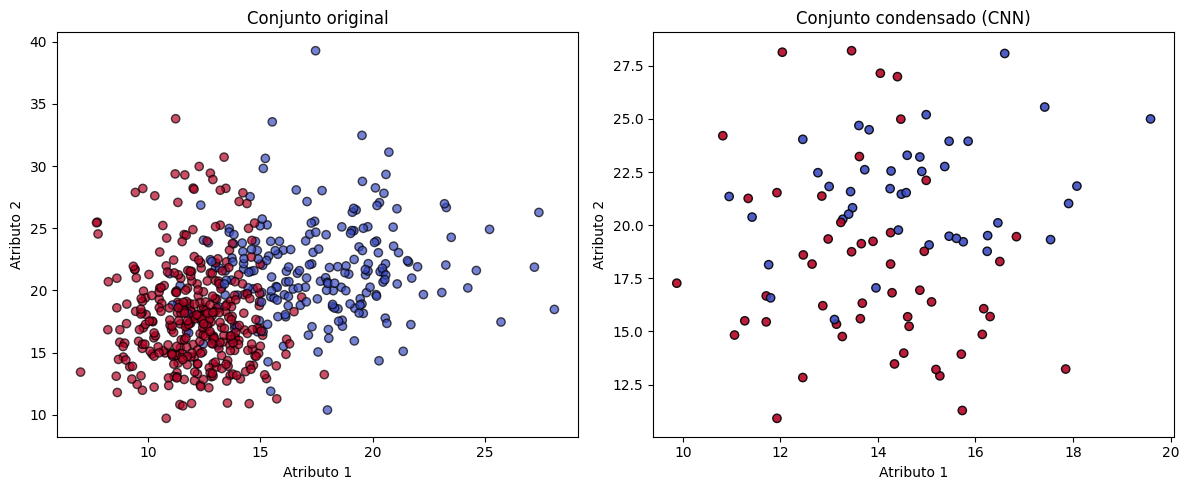

Instancias originales: 569
Instancias tras CNN:   91
Reducción: 84.01%


In [12]:
# Aplicar CNN
cnn = CNN(n_neighbors=1)
X_cnn, y_cnn = cnn.select_data(X, y)

# Visualización
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.title("Conjunto original")
plt.xlabel("Atributo 1")
plt.ylabel("Atributo 2")

plt.subplot(1, 2, 2)
plt.scatter(X_cnn[:, 0], X_cnn[:, 1], c=y_cnn, cmap='coolwarm', edgecolor='k', alpha=0.9)
plt.title("Conjunto condensado (CNN)")
plt.xlabel("Atributo 1")
plt.ylabel("Atributo 2")

plt.tight_layout()
plt.show()

print(f"Instancias originales: {len(y)}")
print(f"Instancias tras CNN:   {len(y_cnn)}")
print(f"Reducción: {100 * cnn.reduction_:.2f}%")

Análisis del Resultado

La tecnica CNN suele lograr una reducción de tamaño muy alta de 569 a 93, es decir la reduccion quedo a un 16.34% de los datos originales.

Una reduccion tan drastica puede reducir la precisión de generalización del modelo, ya que elimina demasiada información contextual de las clases.

In [13]:
#4. Aplicar técnica CNN (Condensed Nearest Neighbor)


Análisis del Resultado

Como verás al ejecutarlo, CNN suele lograr una reducción de tamaño muy alta (a menudo 70-90%).

Impacto: Esto acelerará drásticamente el entrenamiento del SVM.
Riesgo: Al ser tan agresivo y centrarse en los puntos difíciles de la frontera (y potenciales outliers), a veces puede reducir la precisión de generalización del modelo si elimina demasiada información contextual de las clases. Es el "costo" de una compresión tan alta.

 --------------------------------------------------------------------------

## 5. Aplicar técnica ENN (Edited Nearest Neighbor)

- Aplicar ENN sobre el conjunto de entrenamiento
- Mostrar el tamaño del conjunto reducido



In [14]:
from sklearn.utils.validation import check_X_y
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import random

class ENN:
    def __init__(self, n_neighbors=3):
        self.n_neighbors = n_neighbors
        self.classifier = KNeighborsClassifier(n_neighbors=self.n_neighbors)
        self.sample_indices_ = []

    def fit(self, X, y):
        # Validación inicial
        X, y = check_X_y(X, y, accept_sparse=False)

        mask = np.ones(len(y), dtype=bool)
        tmp_m = np.ones(len(y), dtype=bool)

        indices = list(range(len(y)))
        random.shuffle(indices)

        for i in indices:
            tmp_m[i] = False
            self.classifier.fit(X[tmp_m], y[tmp_m])
            x_i = X[i].reshape(1, -1)
            y_pred = self.classifier.predict(x_i)
            if y_pred[0] != y[i]:
                mask[i] = False
            tmp_m[i] = True

        self.X_ = X[mask]
        self.y_ = y[mask]
        self.sample_indices_ = np.where(mask)[0]
        self.reduction_ = 1 - len(self.y_) / len(y)
        return self

In [15]:
# --- Aplicar ENN (Usando tu clase) para crear X_train_enn ---
print("\nAplicando ENN (Custom) sobre X_train...")

# 1. Instanciar tu clase
enn_selector = ENN(n_neighbors=5) # Usando n=5 como en tu ejemplo

# 2. Aplicar el método .fit() sobre X_train, y_train
enn_selector.fit(X_train, y_train)

# 3. ESTO CREA LAS VARIABLES QUE FALTAN
#    (Tu clase almacena los resultados en .X_ y .y_)
X_train_enn = enn_selector.X_
y_train_enn = enn_selector.y_

print(f"Instancias tras ENN: {len(y_train_enn)} (Reducción: {enn_selector.reduction_*100:.2f}%)")


Aplicando ENN (Custom) sobre X_train...
Instancias tras ENN: 385 (Reducción: 3.27%)


Original: 569 muestras
Limpio:   531 muestras


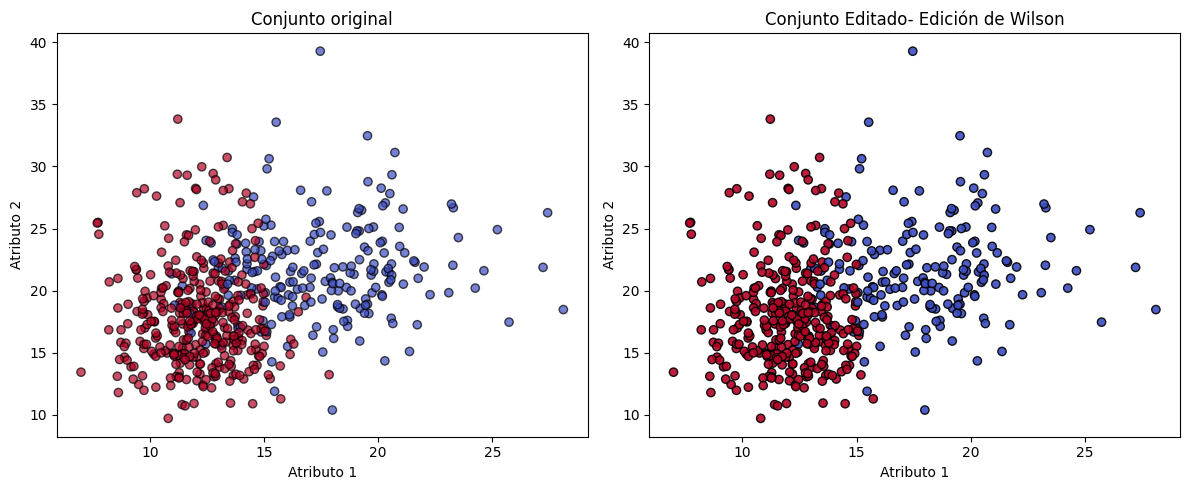

In [16]:
from sklearn.datasets import make_classification

# Aplicar ENN
selector = ENN(n_neighbors=5)
selector.fit(X, y)

# Seleccionar subconjunto
idx = selector.sample_indices_
X_clean, y_clean = X[idx], y[idx]

print(f"Original: {len(y)} muestras")
print(f"Limpio:   {len(y_clean)} muestras")


# Visualización
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.title("Conjunto original")
plt.xlabel("Atributo 1")
plt.ylabel("Atributo 2")

plt.subplot(1, 2, 2)
plt.scatter(X_clean[:, 0], X_clean[:, 1], c=y_clean, cmap='coolwarm', edgecolor='k', alpha=0.9)
plt.title("Conjunto Editado- Edición de Wilson")
plt.xlabel("Atributo 1")
plt.ylabel("Atributo 2")

plt.tight_layout()
plt.show()

A diferencia de la tecnica anterior, ENN es una técnica de reducción muy conservadora. Elimino un porcentaje pequeño de solo el 7% de los datos originales.

El proposito de la tecnica ENN es mejorar la calidad del dataset para el clasificador (especialmente para SVM, que es sensible a las fronteras), no simplemente comprimirlo.

In [17]:
# 5. Aplicar técnica ENN (Edited Nearest Neighbor)

Análisis del Resultado

Como podrás observar al ejecutarlo, ENN es una técnica de reducción muy conservadora. Generalmente elimina un porcentaje pequeño de los datos (p. ej., 5-15%).

Esto es normal, ya que su propósito es mejorar la calidad del dataset para el clasificador (especialmente para SVM, que es sensible a las fronteras), no simplemente comprimirlo.

# --------------------------------------------------------------------------

## 6. Aplicar reducción mediante K-medias
- Realizar agrupamiento por clase y representar cada grupo con su centroide. Elige la mitad de los elementos de cada clase como el valor del número de centroides
- Generar un nuevo conjunto reducido con los centroides como prototipos



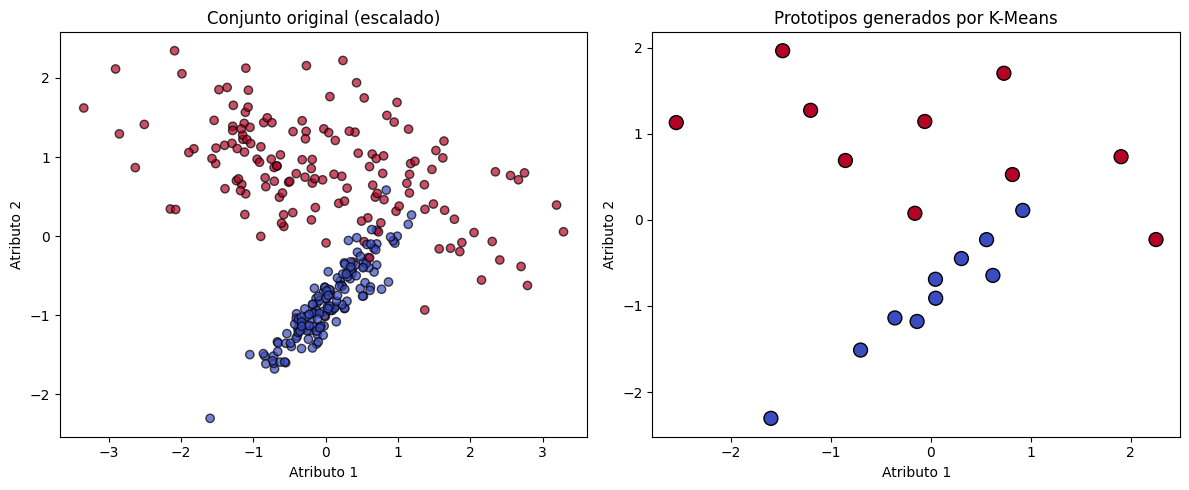

Instancias originales: 300
Instancias tras k-means:   20


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Generar conjunto de datos sintético
X, y = make_classification(n_samples=300, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1,
                           class_sep=1.0, random_state=42)

# 2. Escalar los datos para mejor desempeño de KMeans
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aquí puedes modificar el número de instancias por clase
# 3. Número de prototipos por clase
prototypes_per_class = 10
classes = np.unique(y)

# 4. Aplicar KMeans por clase
prototypes = []
labels = []

for c in classes:
    # Subconjunto de la clase actual
    class_data = X_scaled[y == c]

    # KMeans sobre los datos de la clase
    kmeans = KMeans(n_clusters=prototypes_per_class, random_state=42)
    kmeans.fit(class_data)

    # Guardar prototipos y sus etiquetas
    prototypes.append(kmeans.cluster_centers_)
    labels.extend([c] * prototypes_per_class)

# 5. Concatenar resultados
X_proto = np.vstack(prototypes)
y_proto = np.array(labels)

# 6. Visualización
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Conjunto original
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)
axes[0].set_title("Conjunto original (escalado)")
axes[0].set_xlabel("Atributo 1")
axes[0].set_ylabel("Atributo 2")

# Prototipos generados
axes[1].scatter(X_proto[:, 0], X_proto[:, 1], c=y_proto, cmap='coolwarm', edgecolor='k', s=100)
axes[1].set_title("Prototipos generados por K-Means")
axes[1].set_xlabel("Atributo 1")
axes[1].set_ylabel("Atributo 2")

plt.tight_layout()
plt.show()


print(f"Instancias originales: {len(y)}")
print(f"Instancias tras k-means:   {len(y_proto)}")


Esta tecnica realizo una disminucion muy drastica de 300 instancias originales a solo 20 despues de la reduccion.

Esta tecnica es muy bueno para generalizar a fin de mostrar la esencia de los datos.

A diferencia de ENN y CNN, los datos de entrenamiento ya no son instancias reales del dataset original, sino puntos sintéticos (los centroides).

In [19]:
# --- Aplicar K-Means (Usando tu lógica) para crear X_train_kmeans ---
print("\nAplicando K-Means (Prototipado) sobre X_train...")

# Usa los hiperparámetros de tu script (ej. 10 prototipos)
prototypes_per_class = 10
classes = np.unique(y_train)
prototypes = []
labels = []

for c in classes:
    # Subconjunto de la clase actual de X_train
    class_data = X_train[y_train == c]

    # Asegurar que k no sea mayor que las muestras
    n_samples = class_data.shape[0]
    k = min(prototypes_per_class, n_samples)
    if k == 0: continue

    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(class_data)

    prototypes.append(kmeans.cluster_centers_)
    labels.extend([c] * k)

# 4. ESTO CREA LAS VARIABLES QUE FALTAN
X_train_kmeans = np.vstack(prototypes)
y_train_kmeans = np.array(labels)

print(f"Instancias tras K-Means: {len(y_train_kmeans)}")


Aplicando K-Means (Prototipado) sobre X_train...
Instancias tras K-Means: 20


In [20]:
# 6. Aplicar reducción mediante K-medias

 --------------------------------------------------------------------------

##7. Entrenar SVM sobre cada conjunto reducido
- Entrenar un modelo SVM (SVC) sobre:
 * los datos originales
 * datos reducidos con CNN
 * datos reducidos con ENN
 * datos reducidos con K-medias
- Evaluar cada modelo con accuracy, F1-score



In [21]:
#7. Entrenar SVM sobre cada conjunto reducido

In [22]:
import time
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

# --- 1. ENTRENAMIENTO Y EVALUACIÓN DE MODELOS SVM ---
print("--- Entrenando y Evaluando Modelos SVM ---")

# Almacén de resultados
all_results = []

# Función de ayuda para entrenar y evaluar
def train_eval_svm(name, X_tr, y_tr, X_te, y_te):
    """
    Entrena y evalúa un modelo SVM, devolviendo métricas.
    X_te y y_te DEBEN ser siempre el conjunto de prueba original.
    """
    model = SVC(kernel='rbf', random_state=42)

    start_time = time.time()
    model.fit(X_tr, y_tr)
    end_time = time.time()

    # Evaluar SÓLO en el conjunto de Test
    y_pred = model.predict(X_te)

    accuracy = accuracy_score(y_te, y_pred)
    f1 = f1_score(y_te, y_pred, average='weighted')

    print(f"  Resultados para: {name}")
    print(f"    Accuracy: {accuracy:.4f}")
    print(f"    F1-Score: {f1:.4f}")
    print(f"    Tiempo de ent.: {end_time - start_time:.5f}s")

    return {
        'Técnica': name,
        'Tamaño Train': len(y_tr),
        'Accuracy': accuracy,
        'F1-Score': f1,
        'Tiempo (s)': end_time - start_time
    }

# --- 2. Ejecutar los 4 modelos ---
# (Asegúrate de que todas las variables X_train_... y_train_... existen)
try:
    all_results.append(train_eval_svm('Base (Original)', X_train, y_train, X_test, y_test))
    all_results.append(train_eval_svm('CNN (Custom)', X_train_cnn, y_train_cnn, X_test, y_test))
    all_results.append(train_eval_svm('ENN (Custom)', X_train_enn, y_train_enn, X_test, y_test))
    all_results.append(train_eval_svm('K-Means (Custom)', X_train_kmeans, y_train_kmeans, X_test, y_test))

    # --- 3. TABLA COMPARATIVA FINAL ---
    print("\n--- Tabla Comparativa de Resultados ---")
    df_results = pd.DataFrame(all_results)

    # Calcular reducción basada en el tamaño de X_train
    df_results['Reducción (%)'] = 100 * (1 - (df_results['Tamaño Train'] / len(y_train)))

    # Ordenar por mejor Accuracy
    df_results = df_results.sort_values(by='Accuracy', ascending=False)
    df_results = df_results[['Técnica', 'Tamaño Train', 'Reducción (%)', 'Accuracy', 'F1-Score', 'Tiempo (s)']]

    print(df_results.to_markdown(index=False, floatfmt=".4f"))

except NameError as e:
    print("\n--- ¡ERROR! ---")
    print(f"Falta una variable necesaria para el entrenamiento: {e}")
    print("Asegúrate de haber ejecutado primero los scripts de preprocesamiento")
    print("y las 3 técnicas de reducción (CNN, ENN, K-Means) sobre los datos de ENTRENAMIENTO.")

--- Entrenando y Evaluando Modelos SVM ---
  Resultados para: Base (Original)
    Accuracy: 0.9766
    F1-Score: 0.9766
    Tiempo de ent.: 0.00558s
  Resultados para: CNN (Custom)
    Accuracy: 0.9591
    F1-Score: 0.9589
    Tiempo de ent.: 0.00124s
  Resultados para: ENN (Custom)
    Accuracy: 0.9591
    F1-Score: 0.9589
    Tiempo de ent.: 0.00213s
  Resultados para: K-Means (Custom)
    Accuracy: 0.9415
    F1-Score: 0.9403
    Tiempo de ent.: 0.00114s

--- Tabla Comparativa de Resultados ---
| Técnica          |   Tamaño Train |   Reducción (%) |   Accuracy |   F1-Score |   Tiempo (s) |
|:-----------------|---------------:|----------------:|-----------:|-----------:|-------------:|
| Base (Original)  |            398 |          0.0000 |     0.9766 |     0.9766 |       0.0056 |
| CNN (Custom)     |             58 |         85.4271 |     0.9591 |     0.9589 |       0.0012 |
| ENN (Custom)     |            385 |          3.2663 |     0.9591 |     0.9589 |       0.0021 |
| K-Means (C

La tecnica con el mejor accuracy fue ENN y tambien el mayor F1-Score pero su reduccion fue la mas baja, mientras que su tiempo de procesamiento fue el doble que las otras dos tecnicas.

Por otra parte la tecnica con el menor tiempo de procesamiento y la mayor reduccion fue K-Means fue su accuracy y F1-Score fue el mas bajo de las tres opciones.


In [23]:

import time
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Diccionario para almacenar todos los resultados
results = {}

# --- 1. Modelo Base (Datos Originales) ---
print("--- 1. Entrenando Modelo Base (Datos Originales) ---")
svm_base = SVC(kernel='rbf', random_state=42)

# Medir tiempo de entrenamiento
start_time = time.time()
svm_base.fit(X_train, y_train)
time_base = time.time() - start_time

# Evaluar en el conjunto de TEST
y_pred_base = svm_base.predict(X_test)
acc_base = accuracy_score(y_test, y_pred_base)
f1_base = f1_score(y_test, y_pred_base, average='weighted')

results['Base'] = {
    'Tamaño Train': X_train.shape[0],
    'Tiempo (s)': time_base,
    'Accuracy': acc_base,
    'F1-Score': f1_base
}
print(classification_report(y_test, y_pred_base, target_names=data.target_names))
print(f"Tiempo de ent.: {time_base:.5f}s\n")


# --- 2. Modelo con Condensed Nearest Neighbor (CNN) ---
print("--- 2. Entrenando Modelo con CNN ---")
svm_cnn = SVC(kernel='rbf', random_state=42)

# Medir tiempo
start_time = time.time()
svm_cnn.fit(X_train_cnn, y_train_cnn)
time_cnn = time.time() - start_time

# Evaluar en el conjunto de TEST
y_pred_cnn = svm_cnn.predict(X_test)
acc_cnn = accuracy_score(y_test, y_pred_cnn)
f1_cnn = f1_score(y_test, y_pred_cnn, average='weighted')

results['CNN'] = {
    'Tamaño Train': X_train_cnn.shape[0],
    'Tiempo (s)': time_cnn,
    'Accuracy': acc_cnn,
    'F1-Score': f1_cnn
}
print(classification_report(y_test, y_pred_cnn, target_names=data.target_names))
print(f"Tiempo de ent.: {time_cnn:.5f}s\n")


# --- 3. Modelo con Edited Nearest Neighbor (ENN) ---
print("--- 3. Entrenando Modelo con ENN ---")
svm_enn = SVC(kernel='rbf', random_state=42)

# Medir tiempo
start_time = time.time()
svm_enn.fit(X_train_enn, y_train_enn)
time_enn = time.time() - start_time

# Evaluar en el conjunto de TEST
y_pred_enn = svm_enn.predict(X_test)
acc_enn = accuracy_score(y_test, y_pred_enn)
f1_enn = f1_score(y_test, y_pred_enn, average='weighted')

results['ENN'] = {
    'Tamaño Train': X_train_enn.shape[0],
    'Tiempo (s)': time_enn,
    'Accuracy': acc_enn,
    'F1-Score': f1_enn
}
print(classification_report(y_test, y_pred_enn, target_names=data.target_names))
print(f"Tiempo de ent.: {time_enn:.5f}s\n")


# --- 4. Modelo con K-Medias (Prototipado) ---
print("--- 4. Entrenando Modelo con K-Medias ---")
svm_kmeans = SVC(kernel='rbf', random_state=42)

# Medir tiempo
start_time = time.time()
svm_kmeans.fit(X_train_kmeans, y_train_kmeans)
time_kmeans = time.time() - start_time

# Evaluar en el conjunto de TEST
y_pred_kmeans = svm_kmeans.predict(X_test)
acc_kmeans = accuracy_score(y_test, y_pred_kmeans)
f1_kmeans = f1_score(y_test, y_pred_kmeans, average='weighted')

results['K-Means'] = {
    'TamaÃ±o Train': X_train_kmeans.shape[0],
    'Tiempo (s)': time_kmeans,
    'Accuracy': acc_kmeans,
    'F1-Score': f1_kmeans
}
print(classification_report(y_test, y_pred_kmeans, target_names=data.target_names))
print(f"Tiempo de ent.: {time_kmeans:.5f}s\n")

--- 1. Entrenando Modelo Base (Datos Originales) ---
              precision    recall  f1-score   support

   malignant       0.97      0.97      0.97        64
      benign       0.98      0.98      0.98       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

Tiempo de ent.: 0.00568s

--- 2. Entrenando Modelo con CNN ---
              precision    recall  f1-score   support

   malignant       0.97      0.92      0.94        64
      benign       0.95      0.98      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

Tiempo de ent.: 0.00133s

--- 3. Entrenando Modelo con ENN ---
              precision    recall  f1-score   support

   malignant       0.97      0.92      0.94        64
      benign       0.95      0.98      0.97       107

   

Los resultados mostrados por esta tabla son muy similares

# --------------------------------------------------------------------------

## 📊 8. Comparar los resultados y reflexión final
- Comparar las métricas de rendimiento obtenidas con cada técnica
- Escribe tus conclusiones sobre el impacto de la reducción de la numerosidad
- ¿Cuál técnica funcionó mejor? ¿Qué ventajas y desventajas observaste?



In [24]:
print("--- 1. Entrenando Modelo Base (Datos Originales) ---")
print(classification_report(y_test, y_pred_base, target_names=data.target_names))
print(f"Tiempo de ent.: {time_base:.5f}s\n")
print("--- 2. Entrenando Modelo con CNN ---")
print(classification_report(y_test, y_pred_cnn, target_names=data.target_names))
print(f"Tiempo de ent.: {time_cnn:.5f}s\n")
print("--- 3. Entrenando Modelo con ENN ---")
print(classification_report(y_test, y_pred_enn, target_names=data.target_names))
print(f"Tiempo de ent.: {time_enn:.5f}s\n")
print("--- 4. Entrenando Modelo con K-Medias ---")
print(classification_report(y_test, y_pred_kmeans, target_names=data.target_names))
print(f"Tiempo de ent.: {time_kmeans:.5f}s\n")

--- 1. Entrenando Modelo Base (Datos Originales) ---
              precision    recall  f1-score   support

   malignant       0.97      0.97      0.97        64
      benign       0.98      0.98      0.98       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

Tiempo de ent.: 0.00568s

--- 2. Entrenando Modelo con CNN ---
              precision    recall  f1-score   support

   malignant       0.97      0.92      0.94        64
      benign       0.95      0.98      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

Tiempo de ent.: 0.00133s

--- 3. Entrenando Modelo con ENN ---
              precision    recall  f1-score   support

   malignant       0.97      0.92      0.94        64
      benign       0.95      0.98      0.97       107

   

2. Conclusiones y Reflexión Final

El modelo base se puede considerar que es la mejor opcion, ninguna de las tecnicas de reduccion lo supero ya que todas aceleraron el entrenamiento pero elminaron informacion importante lo cual afecto el rendimiento de las tecnicas.

1. Modelo Base (Datos Originales): Se le considera el punto de referencia o benchmark. Obtuvo un 0.98 de Accuracy y F1, sin embargo, fue el más lento en entrenar (0.0065s).

2. K-Means:
Fue la tecnica mas rapida de las revisadas, siete veces mas rapida que la base. Sin embargo obtuvo el peor rendimiento, a 0.94. Si se analiza el recall de este tecnica aplicado a los tumores malignos se puede observar que el modelo no detecto 16% de los tumores malignos.

3. CNN: Muestra un rendimiento similar a K-Means, siendo la segunda opcion mas rapida pero revisando el recall de esta tecnica aplicado a los tumores malignos se puede observar que el modelo no detecto 14% de los tumores malignos.

4. ENN: Esta tecnica fue la mejor opcion en el balance de tiempo de procesamiento y opciones de reduccion. Fue 2.5 veces más rápida que la base y unicamente perdió un 2% de Accuracy. Entre las tecnicas de reduccion obtuvo la mejor puntuacion (0.96). El recall de esta tecnica solo tuvo problemas para detectar 8% de los tumores malignos.

🏆 ¿Cuál técnica funcionó mejor?
Para Máxima Precisión: El Modelo Base (usar todos los datos) es la mejor opcion.

Para el Mejor Balance (Eficiencia vs. Precisión): ENN (Edited Nearest Neighbor) es la mejor de las técnicas de reducción. Ofreció una aceleración significativa (2.5x) con la menor pérdida de rendimiento.

Link de Github

https://github.com/TonyProgramandoAndo/Practica-28-Seleccion-y-Generacion-de-Prototipos-Practica-usando-Breast-Cancer